<a href="https://colab.research.google.com/github/saimadhav507/codeclause/blob/madhav/face_detection_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install face_recognition
from imutils import paths
import face_recognition
import pickle
import cv2
import os
imagePaths = list(paths.list_images('/content/imagePath.jpg'))
knownEncodings = []
knownNames = []
for (i, imagePath) in enumerate(imagePaths):
  name = imagePath.split(os.path.sep)[-2]
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb, model='hog')
  encodings = face_recognition.face_encodings(rgb, boxes)
  for encoding in encodings:
    knownEncodings.append(encoding)
    knownNames.append(name)
data = {"encodings": knownEncodings , "names":knownNames}
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
# import required library
#!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
from google.colab.patches import cv2_imshow

# read the input image
#img = cv2.imread('/content/trisha.jpg')
img = cv2.imread('/content/trisha.jpg', cv2.IMREAD_UNCHANGED)

# convert to grayscale of each frames
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# read haacascade to detect faces in input image
#face_cascade = cv2.CascadeClassifier('haarcascades\haarcascade_frontalface_alt.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# detects faces in the input image
faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(30, 30))
print('Number of detected faces:', len(faces))


Number of detected faces: 1


In [56]:
# loop over all the detected faces
for (x,y,w,h) in faces:

   # To draw a rectangle around the detected face
   cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

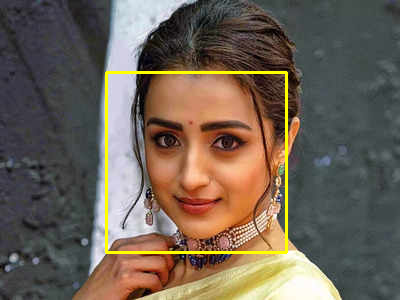

In [57]:
# Display an image in a window
cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()